# 机器学习 Homework 1
**吴博成 2193211134**

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

# section 1 : 随机生成一个由1000个样本组成的分类数据集，特征数为4，共包含两个类别

In [2]:
all_data = datasets.make_classification(n_samples=1000, n_features=4,n_classes=2)
x = all_data[0]
y = np.transpose([all_data[1]])
save_data = np.hstack((x,y))
header=["x1","x2","x3","x4","y"]
np.savetxt("all_data.csv", save_data, delimiter=",",header = "x1,x2,x3,x4,y")# 将数据写入csv
print(save_data)

[[ 1.13594031 -0.85227326 -0.21505858 -0.120076    1.        ]
 [-1.9840027   0.69145386 -0.47841817 -1.60232588  0.        ]
 [ 1.55055977 -0.75276519  0.14635827  0.76948325  1.        ]
 ...
 [-1.47186056  1.53768912  0.74298996  1.14078686  0.        ]
 [ 1.97376547 -0.42070757  0.76221026  2.2014321   1.        ]
 [-0.29183328  0.42734247  0.27851945  0.5045699   0.        ]]


# section 2 : 构造训练集和测试集

In [3]:
[x_train,x_test,y_train,y_test] = model_selection.train_test_split(x,y,test_size=0.2)
train_data = np.hstack((x_train,y_train))
test_data = np.hstack((x_test,y_test))
np.savetxt("train_data.csv", train_data, delimiter=",",header = "x1,x2,x3,x4,y")
np.savetxt("test_data.csv", test_data, delimiter=",",header = "x1,x2,x3,x4,y")
print(train_data)
print(test_data)

[[ 0.69779478 -0.18324265  0.23249537  0.69983644  1.        ]
 [ 1.32117492 -0.38338794  0.40114985  1.24219251  1.        ]
 [-0.97608043  1.37798654  0.87655982  1.57093397  0.        ]
 ...
 [ 0.30921899 -0.08390593  0.10013001  0.30397617  0.        ]
 [-0.60379151 -0.23724695 -0.62524772 -1.50533552  0.        ]
 [ 1.10301867 -1.31403584 -0.73003259 -1.22246737  1.        ]]
[[-9.52345541e-01  1.00394965e+00  4.90394903e-01  7.58613176e-01
   0.00000000e+00]
 [-1.30426358e+00  1.85660556e-01 -6.02606392e-01 -1.66462770e+00
   1.00000000e+00]
 [ 1.40533187e-01  1.13253443e-02  9.84980068e-02  2.50584469e-01
   0.00000000e+00]
 [-5.78009293e-01  1.14769310e-01 -2.32245735e-01 -6.63851686e-01
   0.00000000e+00]
 [-5.85929726e-01  8.39409508e-01  5.39281663e-01  9.70793488e-01
   0.00000000e+00]
 [-3.10570849e-01  1.14764172e-01 -6.78986127e-02 -2.35989291e-01
   0.00000000e+00]
 [ 1.59989783e+00 -3.29101481e-01  6.30600935e-01  1.81152941e+00
   1.00000000e+00]
 [-4.36536435e-01 -2.

# section 3 : 在训练集上训练得到一个决策树模型tree_clf，并使用tree_clf的predict函数预测测试样本的分类结果

In [4]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(x_train,y_train)
prediction = tree_clf.predict(x_test)
print("预测值:{}".format(prediction))

预测值:[0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0
 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0
 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0
 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1
 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0]


# section 4 : 使用score函数获得决策树模型tree_clf的精度

In [5]:
score = tree_clf.score(x_test,y_test)
print("精度:{}".format(score))

精度:0.885


# section 5 : 混淆矩阵、查准率、查全率和f1值

In [6]:
print("混淆矩阵:{}".format(metrics.confusion_matrix(y_true = y_test, y_pred = prediction)))
print("查准率:{}".format(metrics.precision_score(y_true = y_test, y_pred = prediction)))
print("查全率:{}".format(metrics.recall_score(y_true = y_test, y_pred = prediction)))
print("f1值:{}".format(metrics.f1_score(y_true = y_test, y_pred = prediction)))

混淆矩阵:[[100   9]
 [ 14  77]]
查准率:0.8953488372093024
查全率:0.8461538461538461
f1值:0.8700564971751413


# section 6 : 画出ROC曲线

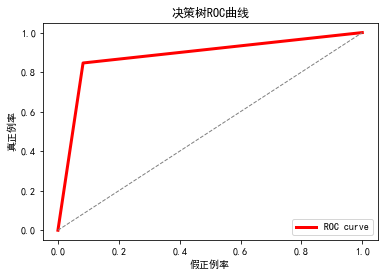

In [7]:
fpr,tpr,threshold = metrics.roc_curve(y_true = y_test, y_score = prediction)
plt.figure()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(fpr, tpr, color='red',
        lw=3, label='ROC curve')
plt.plot([0, 1], [0, 1], color = 'gray', lw=1, linestyle='--')
plt.xlabel('假正例率')
plt.ylabel('真正例率')
plt.title('决策树ROC曲线')
plt.legend(loc="lower right")
plt.show()